# GREATER MANCHESTER COUNTY ROAD ACCIDENTS ANALYSIS

_Analysis by Babatunde Akeredolu_

## Introduction

Road accident is one of the most dangerous threats to the health and lives of people around the world today, thousands of deaths are as a result of road accidents every year. In a bid to proffer solutions to the occurrence of road accidents, I did an analysis of Greater Manchester county road accident dataset, Greater Manchester is a metropolitan county and combined authority area in North West England, with a population of 2.8 million. I provided some recommendations that can help reduce road accidents in this county.

## Contents

1. Introduction

2. Contents

3. Import the libraries

4. Gathering the data

5. Assessing the data

6. Cleaning the data

7. Visualization

8. Recomendations

## Import the libraries

In this section, the required libraries were imported.

In [2]:
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays and performing mathematical functions
import matplotlib as mpl #for data visualization and graphical plotting
import matplotlib.pyplot as plt #for creating static, animated, and interactive visualizations
import seaborn as sns #for making statistical graphics
import warnings
warnings.filterwarnings('ignore') #for ignoring warnings
import plotly.graph_objects as go
from plotly.graph_objects import Layout

## Data Wrangling

### Gathering the data

The dataset used in this analysis was downloaded from data.world and can be assessed [here.](https://data.world/datagov-uk/25170a92-0736-4090-baea-bf6add82d118/workspace/file?filename=2010-2020-stats19-data-accidents-greater-manchester-4.csv)

In [3]:
#specify the file path
filepath = 'C:/Users/asus/Desktop/DATA ANALYTICS/projects/greater manchester accidents' 

#specify the file name
filename = '2010-2020-stats19-data-accidents-greater-manchester-4.csv' 

Fullfilepath = filepath + '/' + filename #join the file path with the file name

Manchester_dataset = pd.read_csv(Fullfilepath) #import the dataset

### Assessing the data

This section helps in understanding the data. The dataset was assessed for quality and tidiness issues both programmatically and visually. The number of rows and columns; column types and contents; duplicated rows and null values were all assessed. I had to do this to better understand the data I will be working with and also identify the cleaning processes to be carried out.

In [4]:
Manchester_dataset.head() #print the first five rows

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,Easting,Northing,...,Road2Class,Road2Number,PedCrossingHumanControl,PedCrossingPhysicalFacilities,LightingCondition,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported
0,102262412010,2010,3,2,1,01/01/2010,6,13:10,382347,390025,...,3,5103,0,0,1,1,4,0,0,1
1,102262562010,2010,3,2,1,01/01/2010,6,11:10,381892,390582,...,7,0,0,0,1,1,4,0,0,1
2,102264322010,2010,3,2,1,01/01/2010,6,17:30,385840,403134,...,7,0,0,0,4,1,2,0,0,2
3,107264182010,2010,3,3,1,01/01/2010,6,13:49,377762,403302,...,1,60,0,0,3,9,1,0,0,2
4,114261842010,2010,3,1,1,01/01/2010,6,01:55,355982,404620,...,0,0,0,0,7,9,1,0,0,2


In [5]:
Manchester_dataset.info() #display info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42624 entries, 0 to 42623
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Accident Index                 42624 non-null  int64 
 1   Year                           42624 non-null  int64 
 2   Severity                       42624 non-null  int64 
 3   NumberVehicles                 42624 non-null  int64 
 4   NumberCasualties               42624 non-null  int64 
 5   OutputDate                     42624 non-null  object
 6   Day                            42624 non-null  int64 
 7   OutputTime                     42624 non-null  object
 8   Easting                        42624 non-null  int64 
 9   Northing                       42624 non-null  int64 
 10  LocalAuthority                 42624 non-null  int64 
 11  Road1Class                     42624 non-null  int64 
 12  Road1Number                    42624 non-null  int64 
 13  C

In [6]:
Manchester_dataset.isnull().sum() #check for null values

Accident Index                   0
Year                             0
Severity                         0
NumberVehicles                   0
NumberCasualties                 0
OutputDate                       0
Day                              0
OutputTime                       0
Easting                          0
Northing                         0
LocalAuthority                   0
Road1Class                       0
Road1Number                      0
CarriagewayType                  0
SpeedLimit                       0
JunctionDetail                   0
JunctionControl                  0
Road2Class                       0
Road2Number                      0
PedCrossingHumanControl          0
PedCrossingPhysicalFacilities    0
LightingCondition                0
WeatherCondition                 0
RoadSurface                      0
SpecialConditions                0
CarriagewayHazard                0
PlaceReported                    0
dtype: int64

In [7]:
Manchester_dataset.duplicated().sum() #print the number of duplicated rows

0

### Cleaning the data

To perform the analysis, it is very important that the data to be analyzed is clean as unclean data can lead to inaccurate results. In this section, the following cleaning were performed on the dataset.


* Some columns were dropped as they were not needed for the analysis, only eleven(11) were kept namely: Accident Index, Year, Severity, NumberVehicles, NumberCasualties, OutputDate, Day, OutputTime, SpeedLimit, WeatherCondition and RoadSurface.


* The values in the 'Day' column were represented with numbers ranging from 1 to 7, these numbers were changed to their appropraite string with 1 being 'Sunday' and 7 being 'Monday'. I confirmed this from the 'OutputDate' column.


* The values in the 'WeatherCondition' and 'RoadSurface' column  were changed from numeric representation to string representaion(the numbers were replaced with their apropraite phrases). This was confirmed from [here](https://data.world/datagov-uk/25170a92-0736-4090-baea-bf6add82d118/workspace/file?filename=stats19-road-accident-injury-statistics-report-form-5.pdf)


* The following columns Accident Index, NumberVehicles, Number_of_Vehicles, NumberCasualties, OutputDate and OutputTime were renamed to Accident_id, Number_of_Vehicles, Number_of_Casualties, Date and Time respectively.


* A new column namely 'Hour' was created, the hour was extracted from the time column. Hours with minutes greater than 30 were assigned with an additional value of one while those with 30minutes or less were assigned the exact hour value. For example, the time 11:30 was assigned an hour value of 11 because its minutes(30) was not greater than 30 while the time 2:32 was assigned an hour value of 3 because its minutes(32) is greater than 30.

In [12]:
dataset = Manchester_dataset.copy() #create a copy of the dataset

In [13]:
dataset = dataset.iloc[:, np.r_[0:8, 14,22,23]] #select only the columns needed

In [14]:
#change the weekday from numeric representation to the day name
weekday = []
for column in dataset['Day']:
    if column == 1:
        day = 'Sunday'
        weekday.append(day)
    elif column == 2:
        day = 'Monday'
        weekday.append(day)
    elif column == 3:
        day = 'Tuesday'
        weekday.append(day)
    elif column == 4:
        day = 'Wednesday'
        weekday.append(day)
    elif column == 5:
        day = 'Thursday'
        weekday.append(day)
    elif column == 6:
        day = 'Friday'
        weekday.append(day)
    elif column == 7:
        day = 'Saturday'
        weekday.append(day)
    else:
        day = 'Unknown'
        weekday.append(day)
        
dataset['Day'] = weekday

dataset.head()

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,SpeedLimit,WeatherCondition,RoadSurface
0,102262412010,2010,3,2,1,01/01/2010,Friday,13:10,50,1,4
1,102262562010,2010,3,2,1,01/01/2010,Friday,11:10,30,1,4
2,102264322010,2010,3,2,1,01/01/2010,Friday,17:30,30,1,2
3,107264182010,2010,3,3,1,01/01/2010,Friday,13:49,30,9,1
4,114261842010,2010,3,1,1,01/01/2010,Friday,01:55,30,9,1


In [15]:
m=dataset['WeatherCondition']

#change the weatherCondition column from numeric representation to string representation
conditions = [(m==1),(m==2),(m==3),(m==4),(m==5),(m==6),(m==7),(m==8),(m==9)]

values = ['Fine without high winds','Raining without high winds','Snowing without high winds','Fine with high winds',
         'Raining with high winds','Snowing with high winds','Fog or mist — if hazard','Other','Unknown']

dataset['WeatherCondition'] = np.select(conditions, values)

In [16]:
#create a function to replace numeric representation to string representaton in the 'RoadSurface' column
def replace_column(df, x1, y1, x2, y2, x3, y3, x4, y4, x5, y5):
    empty_list = [] 
    for column in df:
        if column == x1:
            res = y1
            empty_list.append(res) 
        elif column == x2:
            res = y2
            empty_list.append(res)
        elif column == x3:
            res = y3
            empty_list.append(res)
        elif column == x4:
            res = y4
            empty_list.append(res)
        elif column == x5:
            res = y5
            empty_list.append(res)
        else:
            res = 'Unknown'
            empty_list.append(res)
    new_column = input('Enter your new column')
    dataset[new_column] = empty_list
    
    return dataset.head()

In [17]:
#change the 'RoadSurface' column from numeric representation to string representation
replace_column(dataset['RoadSurface'],1,'Dry',2,'Wet / Damp',3,'Snow',4,'Frost / Ice',5,'Flood (surface water over 3cm deep)')

Enter your new columnRoadSurface


,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,SpeedLimit,WeatherCondition,RoadSurface
0,102262412010,2010,3,2,1,01/01/2010,Friday,13:10,50,Fine without high winds,Frost / Ice
1,102262562010,2010,3,2,1,01/01/2010,Friday,11:10,30,Fine without high winds,Frost / Ice
2,102264322010,2010,3,2,1,01/01/2010,Friday,17:30,30,Fine without high winds,Wet / Damp
3,107264182010,2010,3,3,1,01/01/2010,Friday,13:49,30,Unknown,Dry
4,114261842010,2010,3,1,1,01/01/2010,Friday,01:55,30,Unknown,Dry


In [18]:
#rename some columns
dataset = dataset.rename(columns ={'Accident Index':'Accident_id', 'NumberVehicles':'Number_of_Vehicles',
                                  'NumberCasualties':'Number_of_Casualties', 'OutputDate':'Date', 'OutputTime':'Time'})

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42624 entries, 0 to 42623
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Accident_id           42624 non-null  int64 
 1   Year                  42624 non-null  int64 
 2   Severity              42624 non-null  int64 
 3   Number_of_Vehicles    42624 non-null  int64 
 4   Number_of_Casualties  42624 non-null  int64 
 5   Date                  42624 non-null  object
 6   Day                   42624 non-null  object
 7   Time                  42624 non-null  object
 8   SpeedLimit            42624 non-null  int64 
 9   WeatherCondition      42624 non-null  object
 10  RoadSurface           42624 non-null  object
dtypes: int64(6), object(5)
memory usage: 3.6+ MB


In [20]:
dataset['Hour'] = pd.to_datetime(dataset['Time']).dt.hour #create a new column for the specific hour

dataset['Minute'] = pd.to_datetime(dataset['Time']).dt.minute #create a new column for the specific minute

In [21]:
dataset['Minute'] = pd.to_numeric(dataset['Minute']) #convert the 'Minute' column type to numeric

In [22]:
conditions1 = [(dataset['Minute'] > 30), (dataset['Minute'] <=30)] #set the conditions

values1 = [(dataset['Hour'] + 1), dataset['Hour']] #set the values

dataset['Hour'] = np.select(conditions1,values1) #add one hour to the 'hour' column if minute is more than 30

In [23]:
dataset['Hour'] = dataset['Hour'].replace(24, 0) #replace 24hour with 0

I had to change the 24hr to 0hr so the dataset can be consistent as both values were referring to the same hour of the day

In [24]:
dataset.tail() #print the last five rows

,Accident_id,Year,Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day,Time,SpeedLimit,WeatherCondition,RoadSurface,Hour,Minute
42619,100792182020,2020,3,2,1,31/12/2020,Thursday,06:40,30,Snowing without high winds,Snow,7,40
42620,102787772020,2020,3,2,1,31/12/2020,Thursday,06:30,30,Snowing without high winds,Snow,6,30
42621,102790472020,2020,3,2,2,31/12/2020,Thursday,20:10,30,Fine without high winds,Frost / Ice,20,10
42622,106790322020,2020,3,2,2,31/12/2020,Thursday,15:00,30,Fine without high winds,Wet / Damp,15,0
42623,110787712020,2020,2,1,1,31/12/2020,Thursday,11:56,30,Fine without high winds,Dry,12,56


In [25]:
dataset.drop(columns = {'Minute'}, inplace = True) #drop the minute column

In [26]:
#save the dataset into a csv file
dataset.to_csv('C:/Users/asus/Desktop/DATA ANALYTICS/projects/greater manchester accidents/greater manchester.csv')

## Analysis  & Visualization

#### Visualizing the total accidents by day of the week

In [27]:
#group by 'Day'
weekday_data = dataset.groupby('Day').size().reset_index(name='no of accidents')

weekday_data.head(7) #print first seven rows

,Day,no of accidents
0,Friday,6856
1,Monday,6057
2,Saturday,5639
3,Sunday,4728
4,Thursday,6540
5,Tuesday,6459
6,Wednesday,6345


In [28]:
#group by 'Day'
weekday_data = dataset.groupby('Day').size().reset_index(name='no_of_accidents')

#specify the categories to used
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] 

#change the order of the 'Day' column
weekday_data['Day'] = pd.Categorical(weekday_data['Day'], categories = cats, ordered = True)

weekday_data = weekday_data.sort_values('Day') #sort data by the 'Day' column

(4500.0, 6962.4)

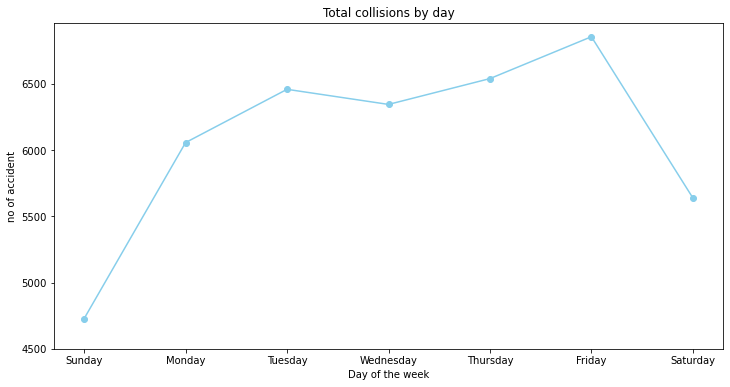

In [31]:
plt.figure(figsize=(12,6)) #set the figure size

#set the data, color and marker to use
plt.plot(weekday_data.Day, weekday_data.no_of_accidents, color='skyblue', marker='o') 
plt.title('Total collisions by day') #set the title
plt.xlabel('Day of the week') #set the xlabel
plt.ylabel('no of accident') #set the ylabel
plt.ylim(4500) #set the y-axis starting position

* Most number of accidents occur on Friday which is towards the weekend
* Least number of accidents occur on Sunday

#### Visualizing the total accidents by time of the day

In [33]:
#group by 'Hour' column
time_data = dataset.groupby('Hour').size().reset_index(name='no_of_accidents')

time_data.head() #print the first five rows

,Hour,no_of_accidents
0,0,718
1,1,545
2,2,445
3,3,364
4,4,287


In [34]:
time_data.info() #check for more info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Hour             24 non-null     int64
 1   no_of_accidents  24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [35]:
#convert 24hour timeframe to 12hour timeframe

am_pm = []
for Hour in time_data['Hour']:
    if Hour == 0:
        t = '12AM' #set 0hour as 12AM
        am_pm.append(t)
    elif (Hour > 0) and (Hour < 12):
        t = str(Hour) + 'AM' #set hours less than 12 as AM
        am_pm.append(t)
    elif Hour == 12:
        t= str(Hour) + 'PM' #set 12hour as 12PM
        am_pm.append(t)
    else:
        t= str(Hour - 12) + 'PM' #set hours greater than 12 as PM
        am_pm.append(t)
    
time_data['Hour'] = am_pm #replace the 'Hour' column with the result

In [36]:
time_data #print the new table

,Hour,no_of_accidents
0,12AM,718
1,1AM,545
2,2AM,445
3,3AM,364
4,4AM,287
5,5AM,264
6,6AM,495
7,7AM,1093
8,8AM,2486
9,9AM,2581


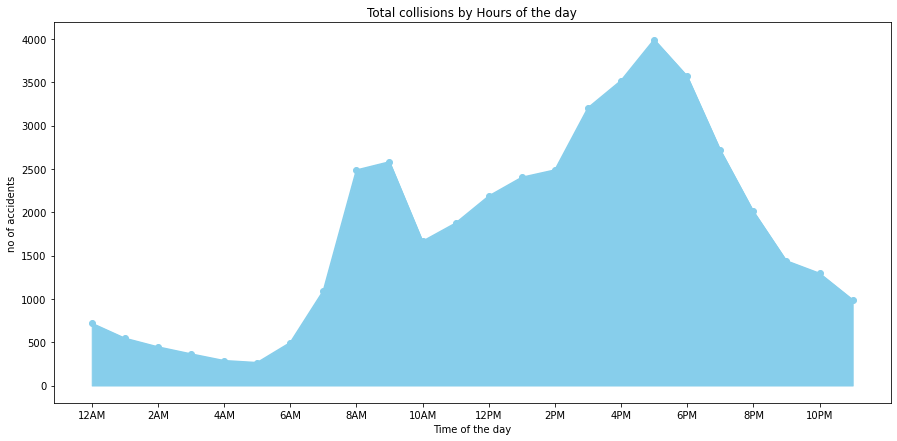

In [40]:
plt.figure(figsize=(15,7)) #set figure size

#set the data, color and marker to use
plt.plot(time_data.Hour, time_data.no_of_accidents, color = 'skyblue', marker = 'o') 
plt.title('Total collisions by Hours of the day') #set title
plt.xlabel('Time of the day') #set the x axis title
plt.xticks(time_data.Hour[::2]) #set intervals between the x values
plt.ylabel('no of accidents') #set the y axis title
plt.fill_between(time_data.Hour, time_data.no_of_accidents, color = 'skyblue')

* Most accidents occur during rush hours(between 4pm and 6pm in the evening) and (8m to 9am in the morning)

#### Visualizing the most unique number of vehicles involved in the accidents

In [41]:
#group by 'Number_of_Vehicles' column
vehicle_data = dataset.groupby('Number_of_Vehicles').size().reset_index(name='total_accidents').sort_values(
    'total_accidents', ascending = False).head(6)

Text(0, 0.5, 'Total accidents')

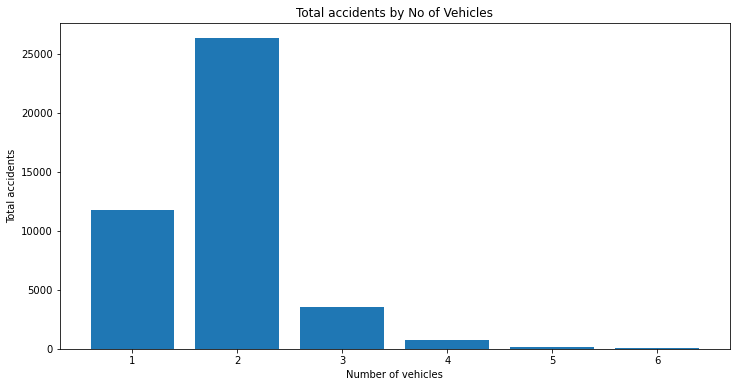

In [42]:
plt.figure(figsize=(12,6)) #set figure size

#set the data to use
plt.bar(vehicle_data.Number_of_Vehicles, vehicle_data.total_accidents)  
plt.title('Total accidents by No of Vehicles') #set title
plt.xlabel('Number of vehicles') #set the x axis title
plt.ylabel('Total accidents') #set the y axis title

* Most unique number of vehicles involved in the accidents is two(2)

More Visualizations on my Tableau Dashboard [here](https://public.tableau.com/views/GreaterManchesterroadaccidentsdashboard/Dashboard12?:language=en-US&:display_count=n&:origin=viz_share_link)

## Recommendations

* Facilities such as overhead bridge for pedestrians should be provided for safe crossing of pedestrians and other road users.


* Traffic wardens should be provided during rush hours of the day.


* Traffic control devices should be installed at appropriate places for road users to see and follow.


* There should be regular public enlightenment education of the general public especially the motorists on the proper use of the road and road signs.


* There should be strict penalties for road users that fail to follow the road signs and rules.

### THANKS FOR READING MY NOTEBOOK

#### YOU CAN CHECK MY OTHER PAGES

[Medium article](https://medium.com/@tundeakeredolu/15eea35e64c5?source=friends_link&sk=aa9c9b90a9560f0d44dc6df7aeecf0f9)

[Tableau Profile](https://public.tableau.com/app/profile/babatunde.akeredolu)

[LinkedIn](https://www.linkedin.com/in/babatunde-akeredolu-94213a19a)

[Twitter](https://twitter.com/tundeakeredolu1?s=09)